<a href="https://colab.research.google.com/github/akp004/image_compression1/blob/main/video_compression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# for calculating interval
from time import time

In [ ]:
plt.rcParams['figure.figsize'] = 10,8 # setting default figure size for the kernel

In [ ]:
# for clustering image pixels
from sklearn.cluster import KMeans 
from skimage import io

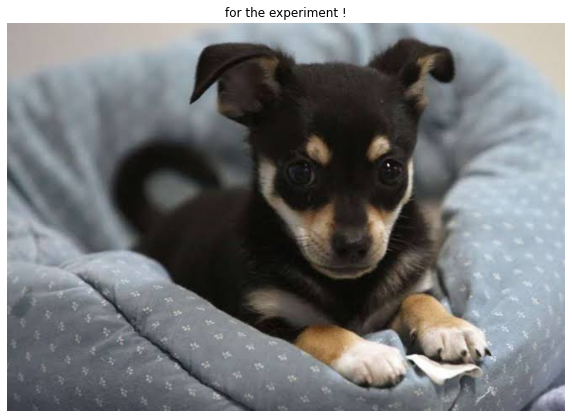

In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTzLzdD4MoAPP3I_JjrxndAqKg1zXtEnaODwsHbH6il9BL3Qt61'
img_original = io.imread(url)
plt.axis('off')
plt.imshow(img_original)
plt.title('for the experiment !')
plt.show()

In [ ]:
img = np.array(img_original,dtype=float) / 255

# Save the dimensions, we will be need them later
w, h, d = original_shape = img.shape
print('Original Shape'.center(20,'='))
print(img.shape)

# image_array size - w*h , d
image_array = img.reshape(-1,d)
print('ReShaped'.center(20,'='))
print(image_array.shape)

===Original Shape===
(462, 664, 3)
======ReShaped======
(306768, 3)


In [ ]:
# In[7]:


n_colours = [64,32]

# 64 colour image
t0 = time()
kmeans64 = KMeans(n_clusters = n_colours[0],random_state=42,verbose=1).fit(image_array)

print('Completed 64 clusters in'+ str({round(time()-t0,2)})+'seconds.')

Initialization complete
Iteration 0, inertia 185.17254901965148
Iteration 1, inertia 147.4726036336637
Iteration 2, inertia 143.90975529144612
Iteration 3, inertia 142.66066063543852
Iteration 4, inertia 141.75552220206615
Iteration 5, inertia 141.17967789029163
Iteration 6, inertia 140.7257964692383
Iteration 7, inertia 140.451991975715
Iteration 8, inertia 140.32437128076612
Iteration 9, inertia 140.24669044419383
Iteration 10, inertia 140.18191540018168
Iteration 11, inertia 140.13039743872827
Iteration 12, inertia 140.0799475277948
Iteration 13, inertia 140.03608355763092
Iteration 14, inertia 140.00774144660812
Iteration 15, inertia 139.96614981417173
Converged at iteration 15: center shift 5.3073300345754796e-06 within tolerance 5.994688738309841e-06.
Initialization complete
Iteration 0, inertia 181.70978854294412
Iteration 1, inertia 149.2039347168414
Iteration 2, inertia 145.9047994937504
Iteration 3, inertia 144.2742475308237
Iteration 4, inertia 143.1871478870605
Iteration 5,

In [ ]:
# 32 colour image
t0 = time()
kmeans32 = KMeans(n_clusters = n_colours[1],random_state=42,verbose=2)
kmeans32.fit(image_array)

print('Completed 32 clusters in' + str({round(time()-t0,2)})+  ' seconds.')

Initialization complete
Iteration 0, inertia 423.5206766629026
Iteration 1, inertia 325.2427036667085
Iteration 2, inertia 310.34321419953494
Iteration 3, inertia 302.0943133111994
Iteration 4, inertia 294.7589354845785
Iteration 5, inertia 288.7521298230987
Iteration 6, inertia 284.5079494766533
Iteration 7, inertia 282.78160097356806
Iteration 8, inertia 282.0106157153912
Iteration 9, inertia 281.337024181414
Iteration 10, inertia 280.9283985305482
Iteration 11, inertia 280.67016901873615
Iteration 12, inertia 280.5745706393198
Iteration 13, inertia 280.5129646664291
Iteration 14, inertia 280.42551653591795
Iteration 15, inertia 280.35941211346665
Converged at iteration 15: center shift 3.866352311757425e-06 within tolerance 5.994688738309841e-06.
Initialization complete
Iteration 0, inertia 359.78415993862603
Iteration 1, inertia 301.0237246513186
Iteration 2, inertia 295.068521928107
Iteration 3, inertia 291.85874598185575
Iteration 4, inertia 289.4494621636263
Iteration 5, inertia

In [ ]:
labels64 = kmeans64.labels_
labels32 = kmeans32.labels_

In [ ]:
#In[8]:


print('Within cluster sum of square error for'+str( {n_colours[0]})+' clusters = '+str({round(kmeans64.inertia_,2)}))
print('Within cluster sum of square error for'+str( {n_colours[1]})+' clusters = '+str({round(kmeans32.inertia_,2)}))
# print('Within cluster sum of square error for {n_colours[1]} clusters = {round(kmeans32.inertia_,2)}')

Within cluster sum of square error for{64} clusters = {137.68}
Within cluster sum of square error for{32} clusters = {278.32}


In [ ]:
# In[9]:


def recreate_image(centroids, labels, w, h):
    # centroids variable are calculated from the flattened image
    # centroids: w*h, d 
    # so each row depicts the values per depth
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            # filling values in new image with centroid values
            image[i][j] = centroids[labels[label_idx]]
            label_idx += 1
    return 

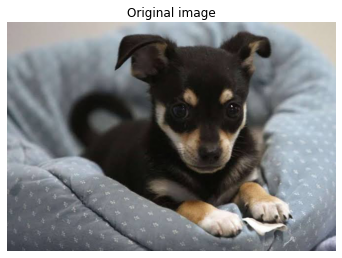

In [ ]:
# In[10]:


plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)


In [ ]:
plt.subplot(131)
plt.axis('off')
plt.title('Compressed image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))

In [ ]:
plt.subplot(133)
plt.axis('off')
plt.title('Compressed image (32 colors, K-Means)')
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))